<style>
@media print
{
h2 {page-break-before:always}
}
</style>

# Homework 07

### Brown University  
### DATA 1010  
### Fall 2019

In [1]:
using Plots, LaTeXStrings, Distributions

## Problem 1

Consider the probability space $\Omega = \mathbb{Z} \times \{\mathrm{A}, \mathrm{B}, \mathrm{C}\}$. We will represent an element of $\Omega$ as $\omega = (\omega_1, \omega_2)$, where $\omega_1 \in \mathbb{Z}$ and $\omega_2 \in \{\mathrm{A}, \mathrm{B}, \mathrm{C}\}$.
Suppose that $\mathbb{P}(\omega_2 = \mathrm{A}) = \frac{1}{4}$,  $\mathbb{P}(\omega_2 = \mathrm{B}) = \frac{1}{5}$, and  $\mathbb{P}(\omega_2 = \mathrm{C}) = \frac{11}{20}$.

Suppose further that  
(i) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{A}\}$ has probability mass function $n\mapsto \frac{1}{3}2^{-|n|}$,  
(ii) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{B}\}$ is the uniform distribution on $\{-2,-1,0,1,2\}$, and  
(iii) the conditional distribution of $\omega_1$ given $\{\omega_2 = \mathrm{C}\}$ has probability mass function $n\mapsto \boldsymbol{1}_{\{n \geq 1\}} \frac{6}{\pi^2 n^2}$.

Find the conditional distribution of the random variable $Y(\omega) = \omega_2$ given: 

* $X = 2$
* $X = 7$
* $X\geq 10$,

where $X$ is the random variable defined by $X(\omega) = \omega_1$. 

(In each case, express the conditional probabilities as percentages rounded to the nearest hundredth of a percent.)

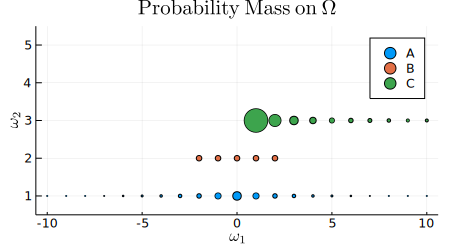

In [2]:
ns = -10:10
scatter([(n,1) for n in ns], markersize = 30*1/4*sqrt.([2.0^(-abs(n))/3 for n in ns]), label = "A")
scatter!([(n,2) for n in -2:2], markersize = 30*1/5*sqrt.([1/5 for n in -2:2]), label = "B")
scatter!([(n,3) for n in 1:ns[end]], markersize = 30*11/20*sqrt.([6/(π^2*n^2) for n in 1:ns[end]]), label = "C")
plot!(ylims=(0.5,5.5), xlabel = L"\omega_1", ylabel = L"\omega_2", fontfamily = "Palatino", size = (450,250), 
        title = L"\mathrm{Probability\: Mass\: on\: }\Omega")

## Problem 2

Show that for each $\alpha \in [0,1]$, there exists $t \in [0,\infty]$ such that such that the likelihood ratio classifier $h_t$ is the function $h: \mathcal{X} \to \mathcal{Y}$ which minimizes
$$
L(h) = 
      \alpha \, \mathbb{P}(h(X) = +1 \text{ and }Y = -1) +
      (1-\alpha) \mathbb{P}(h(X) = -1 \text{ and }Y = +1).
$$
      

(a) Identify the relationship between $\alpha$ and its corresponding $t$ value. (For simplicity, assume that $\mathcal{X}$ is finite.) *Hint:* write $L(h)$ as a sum over the elements $x \in \mathcal{X}$. For each $x$, consider the resulting contribution to that sum if $h(x) = +1$, and similarly for $h(x) = -1$. Classify each $x$ according to which of the two contributions is smaller.


## Problem 3

Suppose that $X$ is a length$-p$ random vector and that we have $n$ observations drawn from the distribution of $X$. Let $\widehat{\Sigma}$ be the plug-in estimator of the covariance matrix of $X$. Show that if $n < p$, then $\widehat{\Sigma}$ is singular. 

## Problem 4

(a) Show that if $f_1, f_2$ are different multivariate normal densities on $\mathbb{R}^2$, then the set of points $(x,y)$ for which $f_1(x,y) = f_2(x,y)$ is a line or a conic section (in other words, it is the solution set of a linear or quadratic equation).
    
(b) Show that if the covariance matrices for the two densities are the same, then the solution set of $f_1(x,y) = f_2(x,y)$ is a line.

  You might find this snippet helpful
```julia
using SymPy
@vars x y μ₁ μ₂ a b c real=true
Σ⁻¹ = [a c; c b]
v = [x - μ₁, y - μ₂]
expand(v' * Σ⁻¹ * v)
```

## Problem 5

(a) Train a logistic regression model to estimate the probability that an observation is red given its $x$ value, given the lists of $x$ values for red and blue observations shown. 

(b) Repeat but with with a prediction function involving a *quadratic* function of the feature value: $x\mapsto 1/(1+\exp(-\alpha-\beta x-\gamma x^2))$. Does the resulting curve have a different shape?

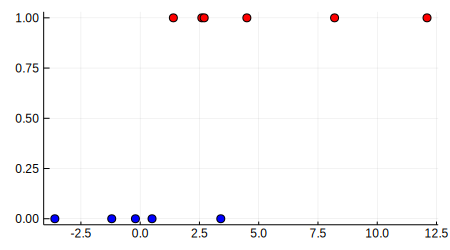

In [3]:
reds = [4.5, 2.6, 2.7, 8.2, 1.4, 12.1]
blues = [0.5, 3.4, -1.2, -3.6, -0.2]
scatter([(r,1) for r in reds], color = :red, legend = false, size = (450, 250))
scatter!([(b,0) for b in blues], color = :blue)

## Problem 6

Explain why the empirical ROC in the the fourth question from [Friday's in-class set](https://nbviewer.jupyter.org/github/data1010/problem-sets/blob/master/10-18/data1010-10-18.ipynb) has a stair-step shape. What would have to be true of the data for the shape to be different?

## Problem 7

Our approach to approximating the ROC empirically depends on having univariate data which are separated by a single threshold. 

(a) Suppose that the probability measure is as shown in the figure below. Plot the actual ROC for this measure. 

(b) Draw 100 observations from this measure, and devise a scheme for using them to empirically approximate the ROC. You may build in the assumption that there will be two thresholds, with the prediction function returning blue between them and red outside them, but you should avoid using any other knowledge of the underlying measure. 

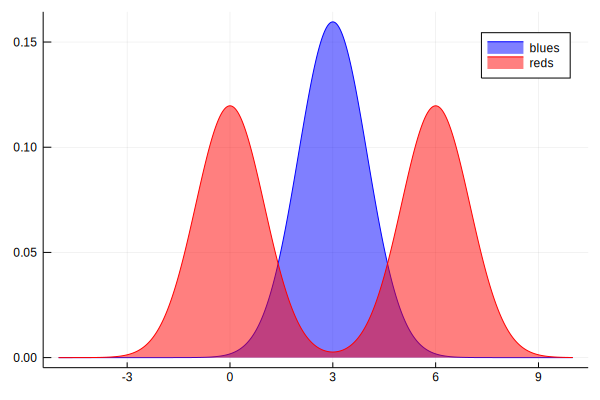

In [4]:
xgrid = -5:0.01:10
plot(xgrid, x->0.4pdf(Normal(3,1),x), fillrange = 0, fillopacity = 0.5, color = :blue, label = "blues")
plot!(xgrid, x->0.6(0.5pdf(Normal(0,1),x) + 0.5pdf(Normal(6,1),x)), fillrange = 0, fillopacity = 0.5, color = :red, label = "reds")

In [5]:
function randpoint()
    if rand() < 0.4
        rand(Normal(3,1)), :blue
    else
        if rand() < 0.5
            rand(Normal(0,1)), :red
        else
            rand(Normal(6,1)), :red
        end
    end
end

n = 1000
points = [randpoint() for _ in 1:n]
n_red = count(p[2] == :red for p in points)
n_blue = n - n_red

403

Then we'll test out all pairs of thresholds (in a grid of possible values) between 0 and 6. 

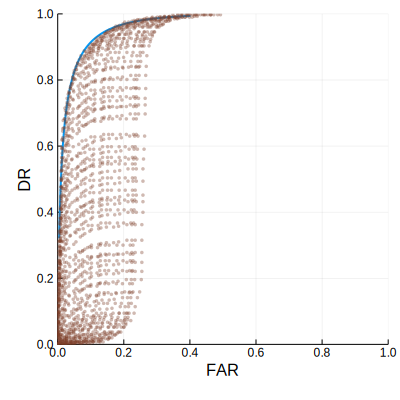

In [6]:
far_dr_pairs = []
for t1 in 0:0.1:6
    for t2 in t1:0.1:6
        push!(far_dr_pairs, (count(p[2] == :red && t1 < p[1] < t2 for p in points)/n_red,
                             count(p[2] == :blue && t1 < p[1] < t2 for p in points)/n_blue))
    end
end
ROC()
scatter!(map(identity, far_dr_pairs), ratio = 1, size = (400,400), 
        xlims = (0,1), ylims = (0,1), legend = false, ms = 2, msw = 0.2, markeropacity = 0.2)

We see that the upper/left edge of the convex hull does match the ROC quite well. Note that we could have calculated this approximate ROC using the idea of the Neyman-Pearson lemma: we identify every point for which there is no other point in the northwest quadrant relative to it (in other words, it's on the frontier in the sense that no other point does better on both DR and FAR). 

## Problem 8

Train a logistic regression classifier for identifying a car as American or Japanese based on its weight and MPG rating. Augment the feature matrix by including quadratic combinations of the regressors.

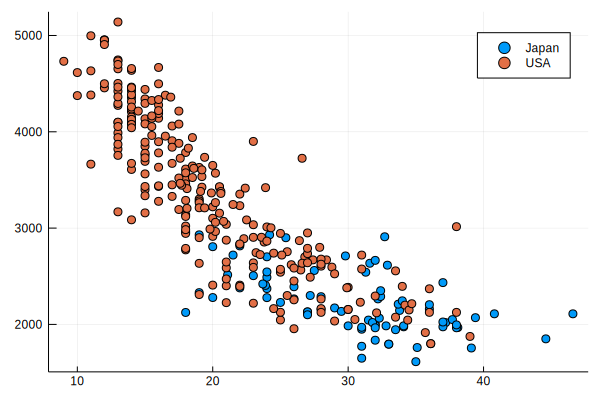

In [7]:
using VegaDatasets, Plots, DataFrames
D = DataFrame(dataset("cars"))
cars = [((x,y),c) for (x,y,c) in zip(D[:,:Miles_per_Gallon],
                                     D[:,:Weight_in_lbs],
                                     D[:,:Origin]) 
           if !any(ismissing.([x,y,c])) && c ≠ "Europe"]
x₁s = [x₁ for ((x₁,x₂),y) in cars]
x₂s = [x₂ for ((x₁,x₂),y) in cars]
ys = [y for ((x₁,x₂),y) in cars]
scatter(x₁s,x₂s,group=ys)

## Problem 9

Train a Naive Bayes classifier for identifying a car as American or Japanese based on its weight and MPG rating. For estimating the marginal densities of each class, just assume that the marginal distributions are Gaussian. 

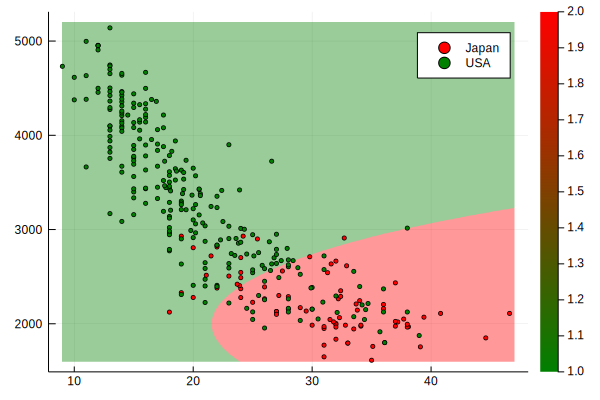

In [8]:
using Distributions
USA = hcat(x₁s,x₂s)[ys .== "USA",:]
Japan = hcat(x₁s,x₂s)[ys .== "Japan",:]
μ_USA, μ_Japan = [vec(mean(country,dims=1)) for country in (USA, Japan)]
Σ_USA, Σ_Japan = [cov(country) for country in (USA, Japan)]
for M in (Σ_USA, Σ_Japan)
 M[1,2] = 0 
 M[2,1] = 0 
end
mesh = 800 
xgrid = range(9,stop=47,length=mesh)
ygrid = range(1600,stop=5200,length=mesh)
p_USA = mean(ys .== "USA")
p_Japan = mean(ys .== "Japan")
f_USA(x,y) = pdf(MvNormal(μ_USA, Σ_USA),[x,y])
f_Japan(x,y) = pdf(MvNormal(μ_Japan, Σ_Japan),[x,y])
heatmap(xgrid, ygrid, 
        (x,y) -> argmax([p_USA * f_USA(x,y), p_Japan * f_Japan(x,y)]),
        fillcolor = cgrad([:green,:red]), opacity=0.4)
scatter!(x₁s,x₂s,group=ys,color=[:red :green],markersize=2)

## Problem 10

Use the code cells below to download public Enron emails (each of which is tagged as spam or "ham" (legitimate) and prepare them for analysis. 

(a) Find the 2000 most common words across both spam and legitimate messages. This will be your vocabulary $W$. 

(b) Regard each message as an element of $\{0,1\}^{2000}$, where the $k$th component of the message is 1 if the $k$th word of $W$ is in the message, and 0 otherwise. Train a classifier which approximates the class conditional distributions on $\{0,1\}^{2000}$ using the Naive Bayes assumption: each probability measure is a product of binomial distributions (one for each component). Your `predict` function should take an email message as input and return `"legitimate"` or `"spam"`. 

(c) Test your function on the messages shown in the last cell below.

*Note: You should not consult examples online to solve this problem. Most solutions use libraries that short-circuit the purpose of the exercise, and you have the tools you need to approach the problem by hand: you can loop through the emails to approximate word frequencies in your vocabulary, multiply proportions to get spam and legitimate message likelihoods, and compare them using the Bayes classifier formula $\operatorname{argmax}_c(p_cf_c(\mathbf{x}))$.*

In [ ]:
import Pkg; Pkg.add("HTTP"); Pkg.add("TextAnalysis")

In [ ]:
using HTTP
url = "http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/"
enron_files = ["enron1.tar.gz", "enron2.tar.gz", "enron3.tar.gz",
               "enron4.tar.gz", "enron5.tar.gz", "enron6.tar.gz"]

tmp_paths = [HTTP.download(url * file) for file in enron_files]

p = tmp_paths[2] # just use the first one initially; you can use the other 5 once you have your model working
run(`tar -xvzf $p`) # unzip the downloaded files

In [9]:
using TextAnalysis
function clean_email(message)
    
    patterns = [:html => (r"<[^<>]+>", " "),
                :number => (r"[0-9]+", "number"),
                :url => (r"(http|https)://[^\s]*", "httpaddr"),
                :email => (r"[^\s]+@[^\s]+", "emailaddr"),
                :dollar => (r"[$]+", "dollar")]
    
    for (symbol, (regex, replacement)) in patterns
        message = replace(message, regex => replacement)
    end
    
    splitting_chars = [' ', '@', '$', '/', '#', '.', '-', ':', '&', '*', '+',
                       '=', '[', ']', '?', '!', '(', ')', '{', '}', ',', '\'', '"',
                       '>', '_', '<', ';', '%']
    raw_words = split(message, splitting_chars)

    # remove all words that are too short
    cleaned_words = [word for word in raw_words if length(word) > 1]

    # remove all non alphanumeric characters from each word
    alpha_numeric_pattern = r"[^a-zA-Z0-9]"
    cleaned_words = [replace(word, alpha_numeric_pattern => "") for word in  cleaned_words]
    
    string_doc = StringDocument(join(cleaned_words, ' '))
    remove_corrupt_utf8!(string_doc)
    stem!(string_doc)
    stemmed_words = split(TextAnalysis.text(string_doc), ' ')
end

clean_email (generic function with 1 method)

In [10]:
cleaned_legit_emails = [clean_email(read("enron1/ham/" * email_file,String)) for email_file in readdir("enron1/ham")]
cleaned_spam_emails = [clean_email(read("enron1/spam/" * email_file,String)) for email_file in readdir("enron1/spam")];

In [11]:
legit_baseline = sum(log1p(-x) for x in values(legit_probabilities)) + log(length(cleaned_legit_emails))
spam_baseline = sum(log1p(-x) for x in values(spam_probabilities)) + log(length(cleaned_spam_emails));
legit_baseline, spam_baseline

(-63.96315516680106, -61.47926397692125)

We do end up having to adjust the threshold to classify these four messages correctly.

In [12]:
test_messages = [
    "Do you still want to play rackets on Friday?",
    "Your purchase won a \$1000 gift card! Click here to claim",
    "Call the IRS immediately to avoid prosecution",
    "Would you mind providing some feedback on this recommendation letter? Thanks!"
]

[predict(message, 3) for message in test_messages]

4-element Array{String,1}:
 "legit"
 "spam" 
 "spam" 
 "legit"